#**Exploring the (Observed) Hertzsprung$-$Russell Diagram for the Solar Neighborhood**

*Astronomy Goals*:

*   (Re)Introduce the *Gaia* mission
*   Plot color$-$magnitude diagrams for the stars within 50 parsecs
*   Identify different evolutionary classes and stellar types in this sample
*   Explore the relationship between mass, temperature, and spectral type
*   Estimate the size of a white dwarf

*Coding Goals*:

*   Download astronomy catalogs into Python
*   Interact with and plot data from tables





#**The European Space Agency's *Gaia* Mission**

**Introduction**

The European Space Agency's *Gaia* mission is measuring the three-dimensional positions for nearly $1.5\times10^9$ objects: their right ascensions (RAs), declinations (DECs), and parallaxes. Furthermore, because it images the sky multple times, *Gaia* is also able to measure proper motions, the angular velocities of objects in both RA and DEC. The five resulting properties$-$the two sky positions, their associated velocities, and parallax$-$comprise the **astrometry** collected by *Gaia*. 

*Gaia* has another instrument that records the brightnesses of the objects it observes, their **photometry**. The *Gaia* early third data release (EDR3) catalog includes measurements of the overall optical brightness, reported as the $G$ magnitude ($G$ for *Gaia* band), for about $1.8\times10^9$ objects. In practice, this $G$ is actually the combination of two separate measurements, one in the blue, known as the $BP$ magnitude, because it is made with a blue photometer, and the other in the red, known as the $RP$ magnitude. This means that we can construct the color $BP - RP$, and together with $G$, we can plot color$-$magnitude diagrams (CMDs) for stars observed by *Gaia*. The CMD is the observer's version of the Hertzsprung$-$Russell Diagram, which plots luminosity as a function of temperature.

There is one additional instrument on *Gaia*: the Radial Velocity Spectrometer (RVS), which records moderate-resolution spectra that are being used to measure radial velocities (RVs). When the full *Gaia* DR3 catalog is released next year, it will include RVs for $\approx$33 million stars, at which point we will have the full three-dimensional positions and motions for those stars. In addition to the RVs, these spectra will be used to measure stellar properties (e.g., effective temperature, surface gravity, metallicity, rotational velocity, magnetic activity).

In this assignement, we will be working with data from the *Gaia* EDR3 catalog, which is hosted in an online archive called [VizieR](https://vizier.u-strasbg.fr/viz-bin/VizieR). 

For more information on *Gaia*:
*   [Overview](https://www.cosmos.esa.int/web/gaia/science)
*   [*Gaia* Data Release Scenario](https://www.cosmos.esa.int/web/gaia/release)
*   [*Gaia* EDR3 on VizieR](https://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=I/350/gaiaedr3)





In [1]:
# In this assignment, you will need the data Gaia has collected for stars within 50 pc. 
# Unfortunately, there has been a problem with running the Gaia query, 
# so instead we have downloaded the catalog from a separate archive: http://tapvizier.u-strasbg.fr/adql/
# and made the file available for you online.

# To have the notebook perform the original query, set the following variable to True.
perform_query = False # set to True if you want the query to run.

#**Setting up our Notebook**

We'll start by importing the Python modules we used last time.

**Import relevant Python modules from Assignment 1**

In [13]:
# Numpy: arrays, numbers, constants, math
import numpy as np

# Matplotlib: plotting
import matplotlib.pyplot as plt

# This disables certain system messages
import warnings
warnings.filterwarnings('ignore')

from astropy import constants as const

#**Some preliminary plots**

**Gaia $BP$, $RP$, and $G$ band sensitivity functions**

The Python code cell below plots *Gaia*'s instrumental sensitivity as a function of wavelength for its three photometric passbands: $BP$, $RP$, and the cumulative $G$ band.

The *Gaia* website provides these sensitivity functions as tables. To simplify the process of loading them into Python, we downloaded the table, edited its format to make it easier to read, and then posted it to a public repository. We use the Python module $\texttt{astropy}$ to read the table from the internet, and then $\texttt{matplotlib}$ to make the figure. 

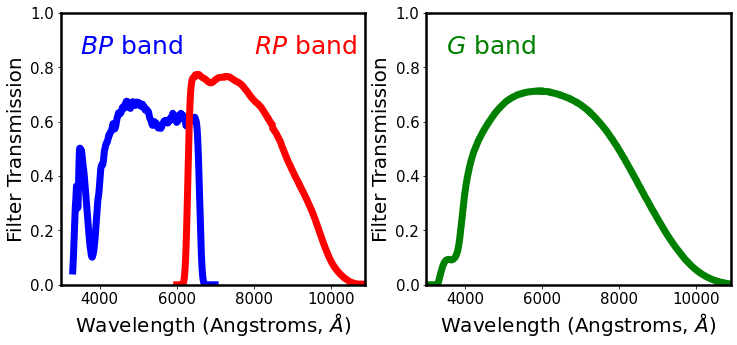

In [3]:
# Load Gaia DR2 passbands from the internet. 
# The file was downloaded from [url], edited so that it loads more easily, then posted to github.
from astropy.io import ascii
url = "https://raw.githubusercontent.com/jasoncurtis/Lessons/main/GaiaDR2_RevisedPassbands.dat"
gaia = ascii.read(url, delimiter=r'\s')  
wave = gaia['wavelength_nm']*10 # Let's store the wavelength column to a new variable called "wave", and let's convert it from nm to angstroms by multiplying by 10.

##############################
# Plot wavelength vs G band

# To make the plot look nicer, we need to trim off the ends, and only focus on the portion of the wavelength where the filter works.
# We can do this with the np.where() function, which pulls out the pieces of a column of data (an array) that match your criteria.

ib = np.where((wave>3300) & (wave<7000)) # Here, we want wavelengths bigger than 3300 Angstroms and less than 7000 angstroms.
# we save the locations/indices in the array into the variable "ib" which I named to mean "indices for the blue filter"
ir = np.where((wave>6000) & (wave<17000)) # indices for the red filter

##############################
# Create the figure space:
# First, we create a canvas for our figure. Doing this lets us control how big the figure will be and what shape it is.
# the object "figure" is the canvas, and the objects "axis_G" and "axis_BP_RP" are the axes where the data will be plotted.
##############################
figure, (axis_BP_RP, axis_G) = plt.subplots(1, 2, figsize=(12,5))

##############################
# Plot G-band filter curve:
##############################
axis_G.plot(wave,gaia['Gband'],c='green',linewidth=7)
# Add a label on the figure
axis_G.text(3500,0.85,r'$G$ band', fontsize=25,c='green') # We can add text to the figure.
# Add axis labels:
axis_G.set_xlabel('Wavelength (Angstroms, $\AA$)', fontsize = 20)  # the $$ dollar signs turn on "math mode" which lets us use fancy symbols and greek letters.
axis_G.set_ylabel('Filter Transmission', fontsize = 20)
# Adjust x and y limits:
axis_G.set_xlim(3000,10900)  # Sets the x-axis range. Notice that it isn't ax.xlim() like the previous plot, but now it is ax.set_xlim(). 
axis_G.set_ylim(0,1)  # Sets the y-axis range

##############################
# Plot BP-band and RP-band filter curves
##############################
axis_BP_RP.plot(wave[ib[0]],gaia['BP'][ib[0]],c='blue',linewidth=7) # to use those indices, you have to attach it to the end of the data column you want like this: [ib[0]] 
axis_BP_RP.plot(wave[ir[0]],gaia['RP'][ir[0]],c='red',linewidth=7) # 
axis_BP_RP.text(3500,0.85,r'$BP$ band', fontsize=25,c='blue')
axis_BP_RP.text(8000,0.85,r'$RP$ band', fontsize=25,c='red')
axis_BP_RP.set_xlabel('Wavelength (Angstroms, $\AA$)', fontsize = 20)
axis_BP_RP.set_ylabel('Filter Transmission', fontsize = 20)
axis_BP_RP.set_ylim(0,1)
axis_BP_RP.set_xlim(3000,10900)

##############################
# Make plot look nice
# These commands make the borders thicker and and numbers bigger.
# I basically copy and paste this block of test for every figure I make.
##############################
# Parameters
axis_border_width = 2.5
fontsize_axis_labels = 15
# axis_G
axis_G.tick_params(axis='both', which='major', labelsize=fontsize_axis_labels)
axis_G.spines['top'].set_linewidth(axis_border_width)
axis_G.spines['left'].set_linewidth(axis_border_width)
axis_G.spines['right'].set_linewidth(axis_border_width)
axis_G.spines['bottom'].set_linewidth(axis_border_width)
# axis_BP_RP
axis_BP_RP.tick_params(axis='both', which='major', labelsize=fontsize_axis_labels)
axis_BP_RP.spines['top'].set_linewidth(axis_border_width)
axis_BP_RP.spines['left'].set_linewidth(axis_border_width)
axis_BP_RP.spines['right'].set_linewidth(axis_border_width)
axis_BP_RP.spines['bottom'].set_linewidth(axis_border_width)

##############################
# Finish the plot
plt.show()

In practice, *Gaia*'s photometric instrument, the BP/RP spectrophotometer, records very low-resolution spectra of all the stars *Gaia* observes. The EDR3 catalog reports photometric magnitudes in the $BP$, $RP$, and $G$ bands. These magnitudes are computed by integrating the spectra obtained by the BP/RP instrument. 

These figures show the senstivity versus wavelength for the three photometric bands. The $BP$ and $RP$ photometers cover blue and red wavelengths extending beyond the visual band (what our eyes can see; $3800 \lesssim \lambda \lesssim 7000$ Angstroms). Together, they form the $G$ band. Why is the $G$ band necessary? To answer this, we will examine stellar spectra for a range of spectral types and effective temperatures. 

**Stellar Spectra**

In this section, we will download stellar spectrum models from the 
[Spectrophotometric atlas of synthesis standard spectra](https://ui.adsabs.harvard.edu/abs/1985ApJS...59...33P/abstract), which is available for download from [VizieR](https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=VII/102).


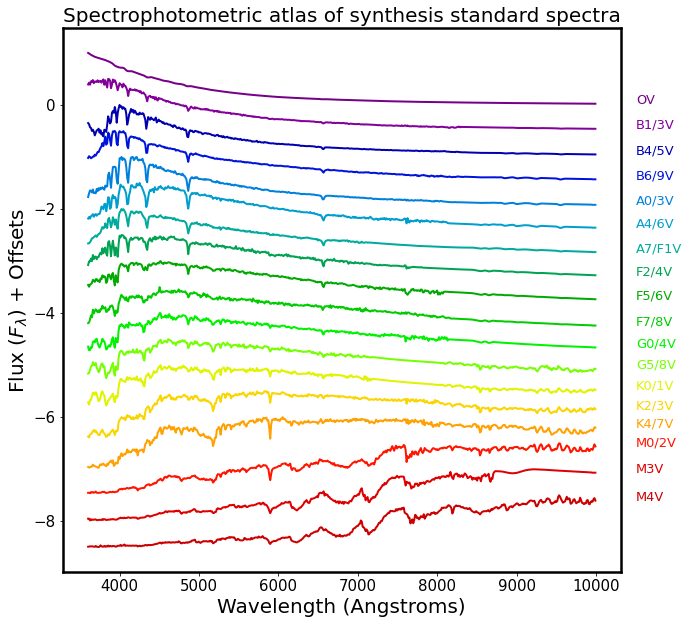

In [4]:
from astropy.io import fits

figure, axis = plt.subplots(figsize=(10,10))
number_of_spectra = 18
#colors = plt.cm.rainbow(np.linspace(0,1,number_of_spectra))
colors = plt.cm.nipy_spectral(np.linspace(0,1,number_of_spectra+2))

for i in range(number_of_spectra):
  number = str(i+1)
  number = str(i+1+48)
  if len(number) == 1:
    number = '0'+number
  file = 'http://cdsarc.u-strasbg.fr/ftp/cats/VII/102/fits/f'+number+'.fit'
  data_open = fits.open(file)
  header = data_open[0].header
  #print(header['OBJECT'])
  spectrum = data_open[0].data
  wave = np.arange(header['NAXIS1'])*header['CDELT1'] + header['CRVAL1']
  axis.plot(wave, spectrum/max(spectrum)-0.5*i, color=colors[i+1], linewidth=2)
  SpT = header['OBJECT']
  if (len(SpT) == 4) | (len(SpT) == 5):
    SpT = SpT[0:2]+'/'+SpT[2:]
  
  axis.text(10500,spectrum[-1]/max(spectrum)-0.5*i,SpT,fontsize=13,color=colors[i+1])


fontsize_labels = 20
axis.set_title('Spectrophotometric atlas of synthesis standard spectra',fontsize=fontsize_labels)
axis.set_xlabel('Wavelength (Angstroms)', fontsize=fontsize_labels)
axis.set_ylabel('Flux ($F_{\lambda}$) + Offsets', fontsize=fontsize_labels)

##############################
# Make plot look nice
##############################
# Parameters
axis_border_width = 2.5
fontsize_axis_labels = 15
# Modify axis
axis.tick_params(axis='both', which='major', labelsize=fontsize_axis_labels)
axis.spines['top'].set_linewidth(axis_border_width)
axis.spines['left'].set_linewidth(axis_border_width)
axis.spines['right'].set_linewidth(axis_border_width)
axis.spines['bottom'].set_linewidth(axis_border_width)

# Finish figure
plt.show()




In the figure above, we have plotted a series of spectra with slight $y$-offsets so they do not overlap. They are color-coded from purple to red according to spectral type, which also corresponds to surface temperature (and mass for main-sequence stars). 

Very hot stars (O- and B-type) can have relatively low $RP$ flux compared to their $BP$ flux, and very cool stars (M-type) can have very low $BP$ flux compared to their $RP$ flux. At either extreme, this can result in very noisy measurements in one band or the other. The $G$ band combines the $BP$ and $RP$ data to provide a single brightness measurement at a lower noise level, and this can be used regardless of the object's spectral energy distribution (the shape of its blackbody, essentially).


*Question*$-$Using these figures as a guide, which star do you expect will have the largest $BP-RP$ color?
> 
Answer: Considering that O and B stars have high BP flux compared to their RP flux, I would expect the OV to have the largest BP-RP color.






#**Querying EDR3**

**Installing Python modules not automatically included in Colab**

We use the "pip install" command to download and install Python modules available online into our session. After the session ends and you reconnect, the program will have to be downloaded again. "pip install" is a command line tool, not a Python tool, so we add an exclamation point in front to use it.

In [5]:
# We need the "astroquery" module. It allows us to download astronomy catalogs. 
# It does not come included with Colab so we have to install it.
#!pip install astroquery 
# "pip install" is a way for installing certain programs in Python. It is run from the "command line" in a terminal on your computer. 
# Since we are working in Colab, we can use command line tools like this by inserting an exclamation point ahead of the command.

# From the "astroquery" module, we want to access data from Gaia. They have a tool for this:
from astroquery.gaia import Gaia

**The 50 parsec sample**

We are going to download all the stars in EDR3 with high-quality astrometric (positions, proper motions, parallaxes) and photometric ($BP$, $RP$, $G$ magnitudes) data within 50 pc. *Gaia*, however, does not provide distances---what it measures are parallaxes, in units of milliarcseconds (mas), where 1 arcsecond = 1000 mas.

*If we want all the stars within 50 pc, what parallax cutoff should we use, in mas?*

In [6]:
maximum_distance = 50.0

# un-comment the two lines below and fill in the formula for converting distance to parallax. 

# parallax_cutoff =   
# print(parallax_cutoff)
parallax_cutoff = 1e3 / maximum_distance 
print(parallax_cutoff)
# What are the units of parallax here? 

# Gaia provides parallaxes in unites of milliarcseconds (written mas). 
# Ensure your parallax criterion is in units of mas.

**What is in the EDR3 Catalog?**

In [7]:
# The Gaia DR3 table is located here:
table_name_gaia = "gaiaedr3.gaia_source" # we will use the new EDR3 catalog

# we can load the "meta data" (information) about the catalog:
meta = Gaia.load_table(table_name_gaia)
#print(meta) # if you want to see what meta contains, uncomment and rerun
# print()
# It gives some basic information and says the table has 96 columns. That means there are 96 different kinds of data stored in this table. 

# The names of the data columns can be printed like this:
for column in meta.columns:
    print(column.name)

# We see some familiar quantities:
#  Positions: ra, dec
#  Parallax: related to the distance
#  Proper motion
#  radial_velocity
#  The apparent G magnitude: phot_g_mean_mag
#  The BP - RP color: bp_rp


# We also see many other quantities that we do not need at this time. 
# Fortunately, there is a way to select only the necessary columns, which will save us time and computer memory. 

Retrieving table 'gaiaedr3.gaia_source'
solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pm
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
nu_eff_used_in_astrometry
pseudocolour
pseudocolour_error
ra_pseudocolour_corr
dec_pseudocolour_corr
parallax_pseudocolour_corr
pmra_pseudocolour_corr
pmdec_pseudocolour_corr
astrometric_matched_transits
visibility_periods_used
astrometric_sigma5d_max
matched_transits
new_matched_transits
matched_transits_removed
ipd_gof_harmonic_amplitude
ipd_gof_harmonic_phase
ipd_frac_multi_peak
ipd_frac_odd_win

**Launch the 50 pc query**

Running this will take a minute or two.

In [8]:
### YOU DO NOT NEED TO FIGURE OUT WHAT THIS CODE BLOCK DOES #####
### but you are welcome to inspect it if you'd like! ###
#################################################################

if perform_query == True:


# Let's ignore very faint stars with G > 18 magnitude
##############################
  Gmag_faint_limit = 14        # Ignore fainter stars by setting Gmag_cut = 18. You can also try Gmag_cut = 16.0. If you want everything try Gmag_cut = 22.0
##############################

# This sets up the query
  table_name_gaia = "gaiaedr3.gaia_source"
  column_names = "source_id, ra, dec, parallax, parallax_error, phot_g_mean_mag as Gmag, bp_rp, pmra, pmdec, dr2_radial_velocity as radial_velocity, dr2_radial_velocity_error as erv, ruwe"

  query_base = """SELECT
  {Columns_Queried}
  FROM {gaia_table}
  WHERE parallax>{parallax_minimum} AND 
  phot_g_mean_mag < {Gmag_Limit} AND
  parallax_over_error > 10 
  AND phot_g_mean_flux_over_error>50
  AND phot_rp_mean_flux_over_error>20
  AND phot_bp_mean_flux_over_error>20
  AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
  AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
  AND visibility_periods_used>8
  AND astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))
  AND ruwe<1.2
  """

# The "ruwe" cut removes stars with poor astrometric solutions, typically wide binaries.
  query = query_base.format(gaia_table = table_name_gaia, Columns_Queried = column_names, Gmag_Limit = Gmag_faint_limit, parallax_minimum = 20.0)

# This launches the "job" which has the server gather the data
  job = Gaia.launch_job_async(query)
  print(job)
  # This downloads the data we want into the variable "gaia_data"
  gaia_nearby = job.get_results()

  print('Number of sources: ',len(gaia_nearby))
  print()
  gaia_nearby[0:5] # This prints the first five lines to screen

else: 
  from astropy.io import fits
  from astropy.table import Table
  url = "https://raw.githubusercontent.com/jasoncurtis/Lessons/blob/main/Gaia_50pc_sample.fit"  
  url = "https://github.com/jasoncurtis/Lessons/blob/main/Gaia_50pc_sample.fit?raw=true"
  gaia_open = fits.open(url)
  gaia_data = gaia_open[1].data
  gaia_nearby = Table({'source_id':gaia_data['Source'], 'ra':gaia_data['RA_ICRS'], 'dec':gaia_data['DE_ICRS'],
                 'parallax':gaia_data['Plx'], 'parallax_error':gaia_data['e_Plx'], 
                 'pmra':gaia_data['pmRA'], 'pmdec':gaia_data['pmDE'], 
                 'pmra_error':gaia_data['e_pmRA'], 'pmdec_error':gaia_data['e_pmDE'], 
                 'gmag':gaia_data['Gmag'], 'Gmag':gaia_data['Gmag'], 'e_Gmag':gaia_data['e_Gmag'],
                 'bp_rp':gaia_data['BP-RP'], 
                 'radial_velocity':gaia_data['RVDR2'],'radial_velocity_error':gaia_data['e_RVDR2']})


#parallax, parallax_error, phot_g_mean_mag as Gmag, bp_rp, pmra, pmdec, dr2_radial_velocity as radial_velocity, dr2_radial_velocity_error as erv, ruwe"                 

In [9]:
# How many stars are on our list? 

number_of_stars = len(gaia_nearby) # Use len() to calculate the number of items in a list.

print('Number of sources: ',number_of_stars)


Number of sources:  21447


We now have a table called $\texttt{gaia_nearby}$, which contains 20,902 stars. We access data in a table using the following syntax:

> $\texttt{Table_Name["Column_Name"]}$


In [10]:
# For example, let's print a summary of the Right Ascension coordinate (column "ra"):

gaia_nearby['ra']

# First, note that you can use either single-quotes or double-quotes, as long as the beginning/end match. 

# Second, there are 21,000 stars in our list, printing them all to screen would be a problem. 
# The notebook recognizes this and print a summary of the first 12 and last 12 entries. 

46.613135424105224
47.29336525491694
43.1958678724688
44.30777209360578
47.90070740667656
46.77548689203329
41.784416283990545
43.165709186489785
42.98653737950994
43.34394291915119
44.031485207345426


In [11]:
# We could also ask for our own segment or slice of this array:

gaia_nearby['ra'][0:3] # This prints the three lines starting on row 0. In Python, we start counting at zero; so the second line is row 1, etc.

46.613135424105224
47.29336525491694
43.1958678724688


We access particular rows of data in a table using the following syntax:

> $\texttt{Table_Name["Column_Name"][list_of_indices]}$


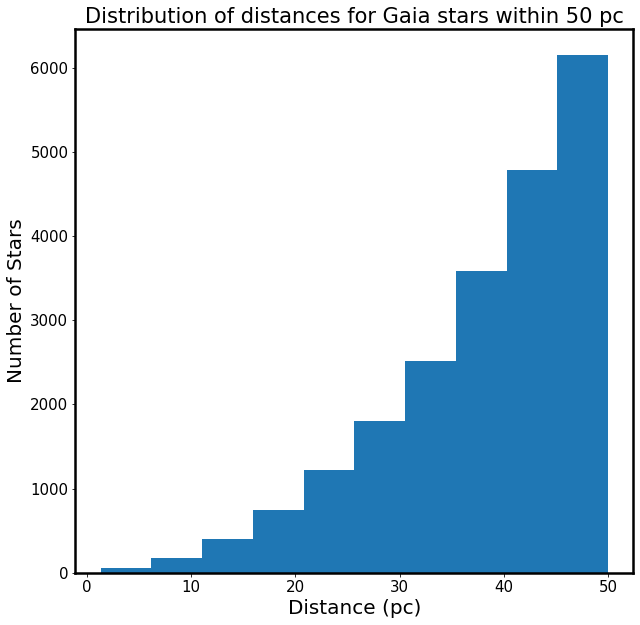

In [40]:
# Let's examine the distribution of distances. 
# We will assume that the inverse parallax is equal to distance.

# Create a figure
figure, axis = plt.subplots(figsize=(10,10))

# Calculate distance
distance = 1e3 / gaia_nearby['parallax']

# Plot the histogram of distances
axis.hist(distance)

# Add x/y-axis labels
axis.set_xlabel('Distance (pc)', fontsize=20)
axis.set_ylabel('Number of Stars', fontsize=20)

# Add title
axis.set_title('Distribution of distances for Gaia stars within 50 pc',fontsize=21)

# Make plot look nice
axis_border_width = 2.5
fontsize_axis_labels = 15
axis.tick_params(axis='both', which='major', labelsize=fontsize_axis_labels)
axis.spines['top'].set_linewidth(axis_border_width)
axis.spines['left'].set_linewidth(axis_border_width)
axis.spines['right'].set_linewidth(axis_border_width)
axis.spines['bottom'].set_linewidth(axis_border_width)


# Conclude the figure
figure.show()

#**Color$-$Magnitude Diagrams for the 50 pc sample**

**Apparent magnitude CMD**

First, let's plot the apparent $G$ magnitude ($\texttt{gmag}$ column) versus the *Gaia* color, $BP - RP$ ($\texttt{bp_rp}$ column). (To be clear, we are using the convention that we plot $y$ vs $x$.)

When setting your axes ranges, remember that in astronomy colors increase from left to right, and magnitudes decrease from bottom to top. 


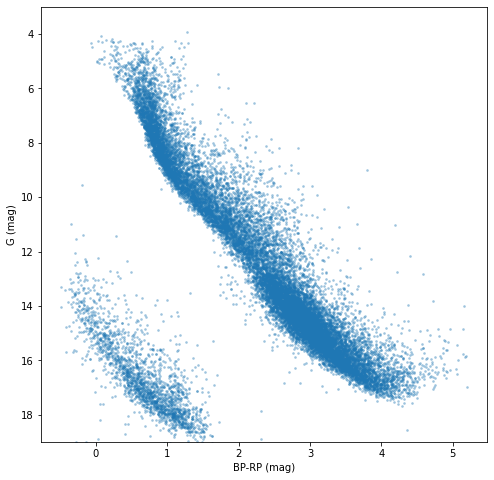

In [12]:
# Plot Gmag vs BP-RP
plt.figure(figsize=(8,8))
plt.scatter(gaia_nearby['bp_rp'], gaia_nearby['gmag'],s=3,alpha=0.3)
plt.xlabel('BP-RP (mag)')
plt.ylabel('G (mag)')
plt.ylim(19,3)
plt.show()

**Distance modulus**

The distance modulus accounts for the decrease in a source's apparent brightness due to its distance:




> $m - M = 5 \, \log_{10}(d/10)$, 

where $m$ represents the apparent magnitude, $M$ is the absolute magnitude, and $d$ is in units of pc.

We have parallax (mas), not distance. Rewrite the equation in terms of *Gaia* parallax using mas units instead of distance. 



> 5*np.log10(100/gaia_nearby['parallax'])


In the code cell below, calculate the distance modulus for all stars in our $\texttt{gaia_nearby}$ table:








In [42]:
# distance_modulus = 
distance_modulus = 5*np.log10(100/gaia_nearby['parallax'])


**Absolute magnitude CMD**

Plot $M_G$ vs $BP - RP$, where $M_G$ is the absolute $G$ magnitude, which you can calculate using $\texttt{gaia_nearby['gmag']}$ and your $\texttt{distance_modulus}$ array.

In [43]:
# Plot M_G vs BP-RP

plt.figure(figsize=(10,10))
plt.scatter(gaia_nearby['bp_rp'], gaia_nearby['gmag'] - 5*np.log10(100/gaia_nearby['parallax']),s=3,alpha=0.3)
plt.ylim(16,-2)
plt.xlabel('BP-RP (mag)')
plt.ylabel('M_G (mag)')
plt.show()

Your two plots should look like the two below (make sure yours have axis labels!). 

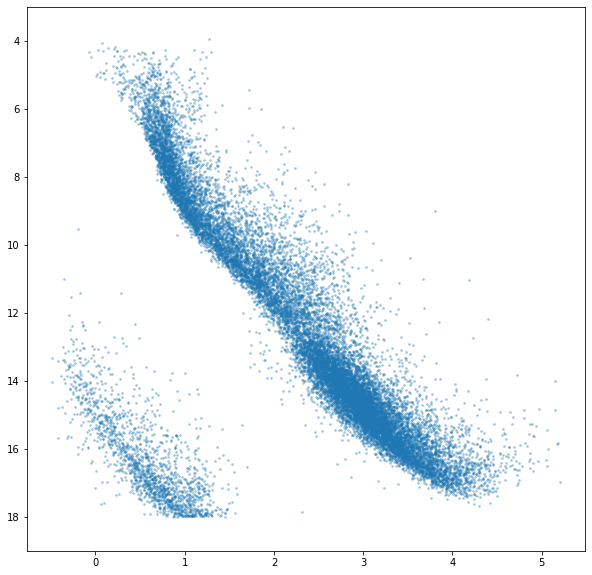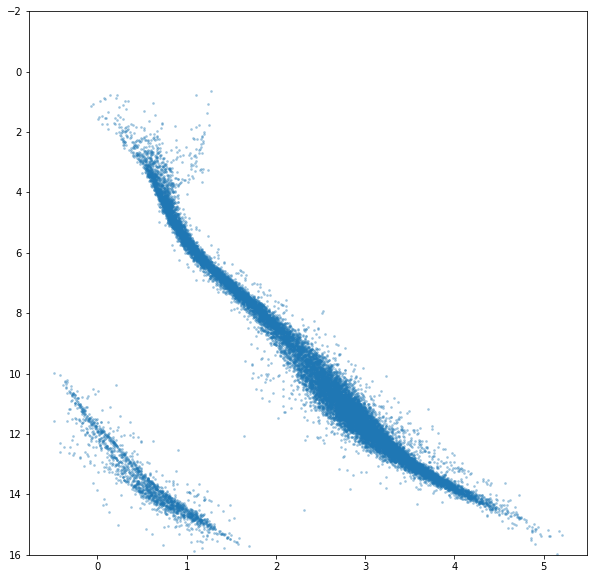

**Absolute *vs.* Apparent Magnitudes**

*Question*$-$Describe the difference between your CMD based on apparent magnitudes and the one based on absolute magnitudes. What would these two CMDs look like if you extended the sample to 100 pc? 

> The main difference is that the absolute plot has a much tighter arrangement of stars. If the sample was extended to 100 pc, I assume that apparent magnitude would have an even larger spread of stars.

Prior to *Gaia*, astronomers had access to parallaxes for about $10^5$ stars from the *Hipparcos* mission, its predecessor. Now we now have parallaxes for $\approx 2 \times 10^9$ stars, and at significantly higher precision. 

*Question*$-$Based on your CMDs, discuss why *Gaia* providing parallaxes for nearly two billion stars is so important for astronomy.

> This is important because having a greater understanding of distances to, and in between stars gives us a better picture of the individual star. In general, measuring the parallax gives us accurate measurments of distance which in turn help us measure the star itself more accurately.



**Stellar Populations**

*Question*$-$What kind of stars do you see in your CMD?



> We see the white dwarfs, the main sequence A-M stars, and also the giants.


#**Inferring Physical Properties from Photometric Colors and Magnitudes**

Photometric color is correlated with effective temperature ($T_{\rm eff}$) and absolute magnitude is correlated with luminosity ($L_\star$). We can therefore use photometry and parallaxes to learn about the physical properties of the stars in our catalog.

**[A Modern Mean Dwarf Stellar Color and Effective Temperature Sequence](http://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt)**

Dr. Eric Mamajek, the Deputy Program Scientist for NASA's Exoplanet Exploration Program, has tabulated photometry and the average stellar properties for dwarf stars. First, we will download and format his table to use:

In [44]:
# Download the table and format it.
import re
from astropy.table import Table

Mamajek_Table_URL = "http://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt"
#Mamajek_table_raw = Table.read(Mamajek_Table_URL, comment='#', format='ascii.tab',header_start=None, data_start=0,data_end=118)
Mamajek_table_raw = Table.read(Mamajek_Table_URL, comment='#', format='ascii.tab',header_start=None, data_start=0,data_end=87)

n_entries = len(Mamajek_table_raw)
column_names = ["SpT", "Teff", "logT", "BCv", "logL", "Mbol", "R_Rsun", "Mv", "B-V", "Bt-Vt", "G-V", "Bp-Rp", "G-Rp", "M_G", "b-y", "U-B", "V-Rc", "V-Ic", "V-Ks", "J-H", "H-Ks", "M_J", "M_Ks", "Ks-W1", "W1-W2", "W1-W3", "W1-W4", "g-r", "i-z", "z-Y", "Msun", "SpT"]  

import pandas as pd
df = pd.DataFrame(index=range(0),columns=column_names[0:-1])
for i in range(n_entries):
  s = Mamajek_table_raw[i][0]
  row_data = np.array(re.split('\s+', s)[0:-1])
  idots = np.where((row_data == '...') | (row_data == '....') | (row_data == '.....'))[0]
  if len(idots) > 0:
    row_data[idots] = np.nan

  data_to_append = {}
  for j in range(len(df.columns)):
    data_to_append[df.columns[j]] = row_data[j]
  df = df.append(data_to_append, ignore_index = True)

for i in range(1,len(column_names)-1):
  df[column_names[i]] = df[column_names[i]].astype(float)

Mamajek_Table = df

Mamajek_Table

,SpT,Teff,logT,BCv,logL,Mbol,R_Rsun,Mv,B-V,Bt-Vt,G-V,Bp-Rp,G-Rp,M_G,b-y,U-B,V-Rc,V-Ic,V-Ks,J-H,H-Ks,M_J,M_Ks,Ks-W1,W1-W2,W1-W3,W1-W4,g-r,i-z,z-Y,Msun
0,O3V,44900.0,4.652,-4.01,5.82,-9.81,13.430,-5.80,-0.330,NaN,NaN,NaN,NaN,NaN,NaN,-1.175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O4V,42900.0,4.632,-3.89,5.65,-9.39,12.130,-5.50,-0.326,NaN,NaN,NaN,NaN,NaN,NaN,-1.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O5V,41400.0,4.617,-3.76,5.54,-9.11,11.450,-5.35,-0.323,NaN,NaN,NaN,NaN,NaN,-0.133,-1.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.62,NaN,NaN,NaN
3,O5.5V,40500.0,4.607,-3.67,5.44,-8.87,10.710,-5.20,-0.322,NaN,NaN,NaN,NaN,NaN,-0.133,-1.145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.62,NaN,NaN,NaN
4,O6V,39500.0,4.597,-3.57,5.36,-8.67,10.270,-5.10,-0.321,NaN,NaN,NaN,NaN,NaN,-0.132,-1.140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.62,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,M7.5V,2630.0,3.420,-5.32,-3.24,12.84,0.116,18.16,2.140,NaN,-3.15,4.72,1.55,15.2,NaN,NaN,2.160,4.56,8.35,0.650,0.422,10.88,9.81,0.260,0.250,NaN,NaN,NaN,1.85,0.74,0.088
83,M8V,2570.0,3.410,-5.65,-3.28,12.95,0.114,18.60,2.150,NaN,-3.11,4.86,1.57,15.2,NaN,NaN,2.150,4.62,8.70,0.677,0.450,11.05,9.92,0.285,0.260,NaN,NaN,NaN,1.93,0.77,0.085
84,M8.5V,2420.0,3.384,-5.78,-3.47,13.42,0.104,19.20,2.160,NaN,-3.09,5.10,1.59,15.9,NaN,NaN,1.967,4.63,8.90,0.690,0.465,11.46,10.30,0.310,0.265,NaN,NaN,NaN,1.96,0.80,0.080
85,M9V,2380.0,3.377,-5.86,-3.52,13.54,0.102,19.40,2.170,NaN,-3.00,4.78,1.60,16.2,NaN,NaN,1.890,4.66,9.00,0.720,0.470,11.59,10.40,0.330,0.270,NaN,NaN,NaN,1.99,0.82,0.079


We are going to use the existence of a relationship between radius and magnitude to derive the radii of stars for which we have absolute magnitudes from *Gaia*. FYI, the Mamajek table is based on observational data (you can skim the original webpage if you wish to see the difficulties involved in assembling it), not theory.

Technically, we are going to *misuse* the radius-magnitude relationship, because the one we have is for main-sequence stars and we are going to use it to derive radii for white dwarfs, which are definitely **not** on the main sequence. But we are not going to worry about that here today!

**Plot radius ($\texttt{R_Rsun}$) versus absolute $G$ magnitude ($\texttt{M_G}$)**

In [45]:
# From Mamajek_Table, plot radius vs M_G 

plt.figure(figsize=(10,10))
plt.scatter(Mamajek_Table['Msun'], Mamajek_Table['logL'])
plt.xlabel('Mass')
plt.ylabel('luminosity')
plt.show()

#**How big are white dwarfs?**

We are going to combine the relationship between radius and $M_G$ you just plotted with your *Gaia* CMD to estimate the radii of two white dwarfs on the  sequence in the lower-left portion of your diagram. Unlike the main sequence, which is a mass sequence but **not** an age sequence, the WD sequence turns out to an age sequence. WDs are not producing any energy from nuclear fusion; they are just radiating away stored heat. Young WDs are therefore hotter and more luminous than older WDs, and so as they cool WDs will move from the top left to the bottom right of what is referred to as the *WD cooling sequence*. 



**First, find the A stars**

In this cell, we use $\texttt{np.where()}$ to identify the A-type stars, which have a similar surface temperature to the hotter white dwarfs in our 50 pc catalog.

In the code cell below, calculate the average absolute $G$ magnitude ($M_G$) for these stars.

In [18]:
# Find the A stars. 

# According to Mamajek's table, A stars are bluer than BP-RP < 0.327
# They are also brighter than M_G < 2.37

# first, calculate M_G if you haven't already
M_G = gaia_nearby['gmag'] - 5*np.log10(100/gaia_nearby['parallax'])

index_Astars = np.where((gaia_nearby['bp_rp'] < 0.327) & 
                            (M_G < 2.37))[0]

# how many A stars on our list? 
print('number of A stars: ',len(index_Astars))

# what is the average bp_rp for these stars? Here, let's use median for the average.
print('Average BP-RP color: ', np.median(gaia_nearby['bp_rp'][index_Astars]))

# what is the average M_G for these stars? 
# print() # fill in the print command



number of A stars:  54
Average BP-RP color:  0.24789071083068848


**Next, find the white dwarfs**

Use $\texttt{np.where()}$ to identify the WDs in our catalog. 

This does not have to be perfect, but try to get most of them.

Once you have a list of WDs, replot your absolute magnitude CMD and highlight the WDs in blue.

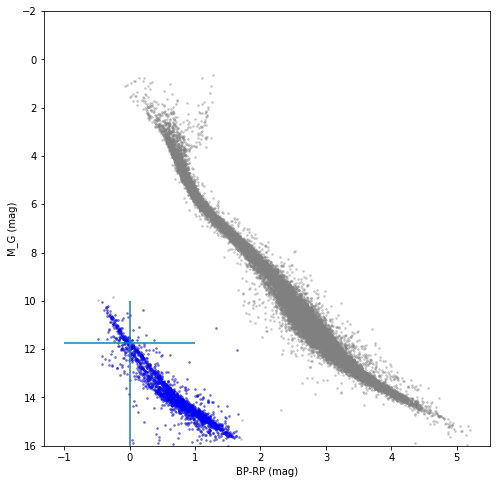

In [15]:
# Copy over your CMD code.

# color-code all the stars as 'gray'
# Add in a line to highlight your WDs in 'blue'.

index_WDs = np.where((gaia_nearby['bp_rp'] < 1.7) & (gaia_nearby['gmag'] - 5*np.log10(100/gaia_nearby['parallax']) > 10))[0]

plt.figure(figsize=(8,8))
plt.scatter(gaia_nearby['bp_rp'], gaia_nearby['gmag'] - 5*np.log10(100/gaia_nearby['parallax']),s=3,alpha=0.3, c='gray')


plt.scatter(gaia_nearby['bp_rp'][index_WDs], gaia_nearby['gmag'][index_WDs] - 5*np.log10(100/gaia_nearby['parallax'][index_WDs]),s=3,alpha=0.3, c='blue')

plt.ylabel('M_G (mag)')
plt.xlabel('BP-RP (mag)')

plt.vlines(0,16,10)
plt.hlines(11.75,-1,1)
plt.ylim(16,-2)
plt.show()

Your plot should look like this (with labels on the axes, of course!): 
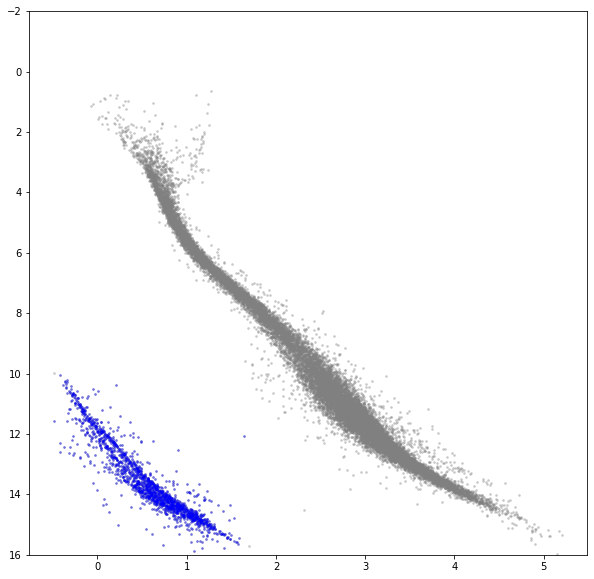

**Finding the radius of a WD**

Using the Mamajek table of main sequence properties, pick the color and magnitude of an early (hot) A star, read off the typical $M_G$ for the WDs at this same color, and use these data to calculate a typical radius for those WDs. The radius you obtain will be in solar units.

In [16]:
# Radius of a white dwarf with the temperature of an A star

radius_Astar = 3.426
magnitude_Astar = 2.63

magnitude_WD = 8.75

luminosity_ratio = 10**((magnitude_Astar - magnitude_WD)/2.5)

# stefan-boltzmann ratio: 

radii_ratio = (luminosity_ratio)**(1/2) 
radius_WD = radii_ratio * radius_Astar

print(radius_WD)



0.20454428918362255


Express this radius in terms of the Earth's radius. 

In [17]:
(const.R_sun / const.R_earth) * radius_WD

<Quantity 22.31094871>